In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [5]:
df = pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [7]:
df.head(5)

# test_df.head(5)

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [8]:
df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 colum

(None, None)

In [12]:
df.isnull().sum(),test_df.isnull().sum()

## no any null values in any null values in train dataset and test dataset

(id                  0
 age                 0
 gender              0
 course              0
 study_hours         0
 class_attendance    0
 internet_access     0
 sleep_hours         0
 sleep_quality       0
 study_method        0
 facility_rating     0
 exam_difficulty     0
 exam_score          0
 dtype: int64,
 id                  0
 age                 0
 gender              0
 course              0
 study_hours         0
 class_attendance    0
 internet_access     0
 sleep_hours         0
 sleep_quality       0
 study_method        0
 facility_rating     0
 exam_difficulty     0
 dtype: int64)

In [14]:
df[df.duplicated()],test_df[test_df.duplicated()]

## no any duplicated values in train dataset and test dataset

(Empty DataFrame
 Columns: [id, age, gender, course, study_hours, class_attendance, internet_access, sleep_hours, sleep_quality, study_method, facility_rating, exam_difficulty, exam_score]
 Index: [],
 Empty DataFrame
 Columns: [id, age, gender, course, study_hours, class_attendance, internet_access, sleep_hours, sleep_quality, study_method, facility_rating, exam_difficulty]
 Index: [])

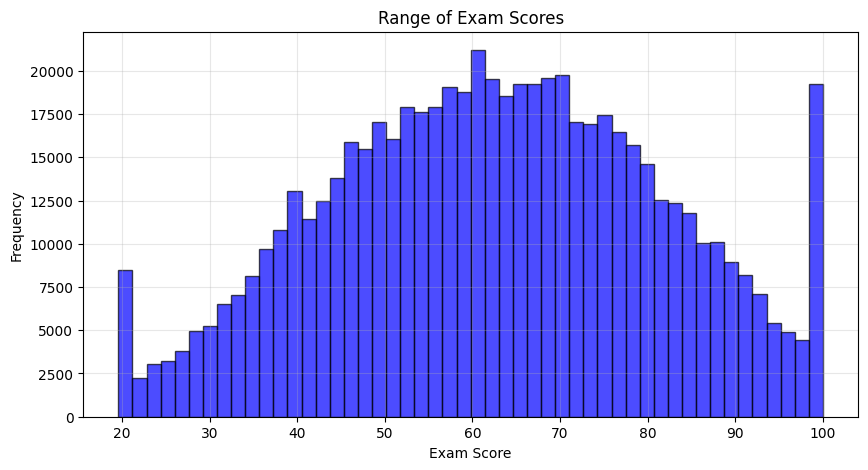

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['exam_score'],bins=50,alpha=0.7,edgecolor='black',color='blue')
plt.title("Range of Exam Scores")
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


## very much amount of student score 100 out of 100 
## conclusion


# Questions may have been straightforward OR

# Paper matched the syllabus very closely OR

# Evaluation was lenient 

In [ ]:
print(df['exam_score'].min())
print(df['exam_score'].max())
print(df['exam_score'].std())
print(df['exam_score'].mean())
print(df['exam_score'].median())
print(df['exam_score'].std())

## from this our mean and median is almost same --> The difference is negligible →
#                                                    very balanced distribution

# No Strong Skewness

# Std = 18.9 is fairly large for a 0–100 scale

# This means:

# Scores are widely spread

# There is high variability

19.599
100.0
18.91688414632426
62.506672165079365
62.6
18.91688414632426
